<h1>How to Create an ARIMA Model for Time Series Forecasting with Python</h1><br>
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [33]:
import sys
# add util lib path
sys.path.append('/Users/gonsoomoon/Documents/DeepLearning/rnn/time_series_prediction/util')

In [34]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
import ts_input  as ui   # user-defined lib
from pandas import DataFrame
shampoo_input = '../input/sales-of-shampoo-over-a-three-ye.csv'
series = ui.load_series_data(shampoo_input)

In [35]:

def convert_to_datestring(idx):
    dt = []
    for i in idx:
        s_date = "190" + str(i[3]) + str(i[4:7])  + "-01"
        dt.append(s_date)
        #print(s_date)
    return dt

dt = convert_to_datestring(series.index)
#print(dt)
#DatetimeIndex.strftime(date_format
series.index = dt
series.index = pd.to_datetime(series.index)
series.index
#series.plot()
#pyplot.show()



DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', freq=None)

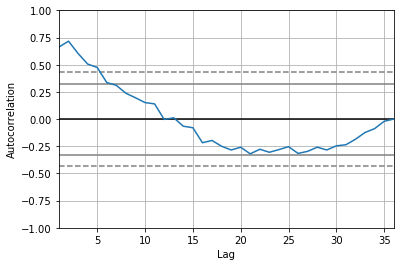

In [36]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags. <br>
A good starting point for the AR parameter of the model may be 5.

In [41]:
from statsmodels.tsa.arima_model import ARIMA
# fit ARIMA model
model = ARIMA(series, order = (5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 10 Jun 2018   AIC                            406.340
Time:                                                 17:04:02   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------

/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


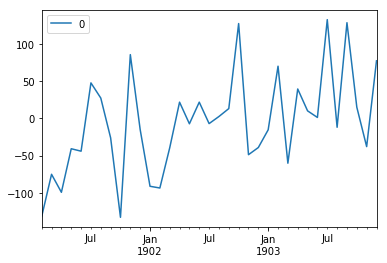

In [42]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()


We get a density plot of the residual error values, suggesting the errors ae Gaussian.

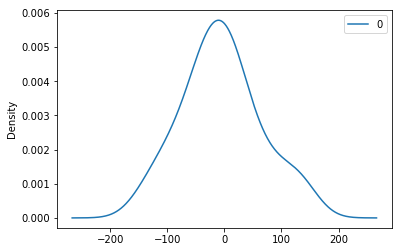

                0
count   35.000000
mean    -5.495224
std     68.132881
min   -133.296605
25%    -42.477940
50%     -7.186618
75%     24.748339
max    133.237977


In [43]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [47]:
X = series.values
size = int(X.shape[0] * 0.66)
train, test = X[0:size], X[size:X.shape[0]]


<h2>Rolling Forecast ARIMA Model</h2><br>
A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observations is received

/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=349.117646, expected=342.300000
predicted=306.513009, expected=339.700000
predicted=387.376421, expected=440.400000
predicted=348.154226, expected=315.900000
predicted=386.308791, expected=439.300000
predicted=356.081947, expected=401.300000
predicted=446.379520, expected=437.400000
predicted=394.737307, expected=575.500000
predicted=434.915651, expected=407.600000
predicted=507.923479, expected=682.000000
predicted=435.483064, expected=475.300000
predicted=652.743808, expected=581.300000
predicted=546.343500, expected=646.900000
Test MSE: 6958.324


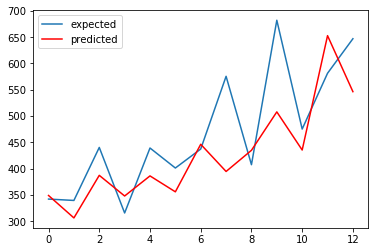

In [51]:
from sklearn.metrics import mean_squared_error
#print(train[0:5])
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(['expected', 'predicted'], loc='upper left');
pyplot.show()

<h2>Configuring an ARIMA Model</h2><br>
1. Model Identification.<br>
Use plots and summary statistics to identify trends,seasonality and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required<br>
2. Parameter Estimation. <br>
Use a fitting procedure to find the coefficients of the regression model.<br>
3. Model Checking. <br>
Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model